In [1]:
%cd ~/PaddleSeg
import pandas as pd
import numpy as np
import random
import os
import matplotlib.pyplot as plt

/home/zifanwang/PaddleSeg


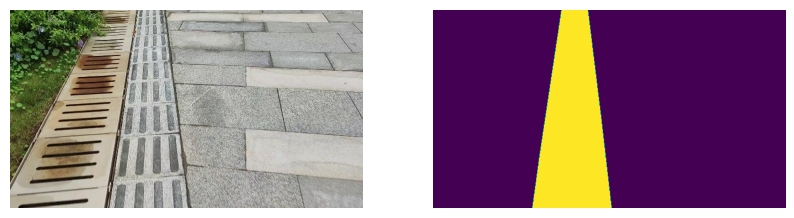

In [4]:

img_path = 'BlindpathDatasets/img'
mask_path = 'BlindpathDatasets/mask'

image_list = os.listdir(img_path)
img_name = random.choice(image_list)
img = plt.imread(os.path.join(img_path,img_name))
mask = plt.imread(os.path.join(mask_path,img_name))
fig, axs = plt.subplots(1,2,figsize=(10,5))
axs[0].imshow(img)
axs[1].imshow(mask[:,:,0])
for a in axs:
    a.axis('off')
plt.show()

In [5]:
print(mask.shape)
print("==============================")
print(mask[:,:,0])
print("==============================")
print(mask[:,:,1])
print("==============================")
print(mask[:,:,2])

(360, 640, 4)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [17]:
x = np.unique(mask*255)

In [18]:
for i in x:
    print(x)

[  0. 128. 255.]
[  0. 128. 255.]
[  0. 128. 255.]


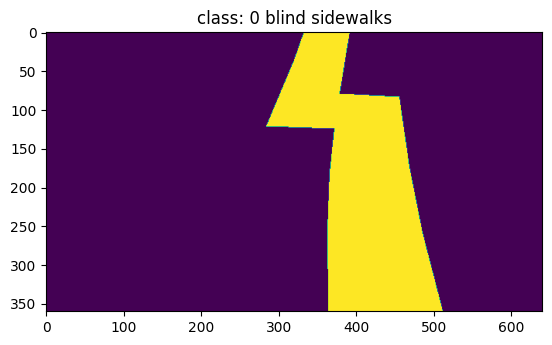

In [20]:
labels = ['blind sidewalks','others']
mask = plt.imread('BlindpathDatasets/mask/pic341.png')*255
#如果等一i就为255其他为0   
mask = np.where(mask == 0, 128, 255)
#取mask
mask1 = mask[:,:,0]
plt.title(f'class: {0} {labels[0]}')
plt.imshow(mask1)
plt.show()

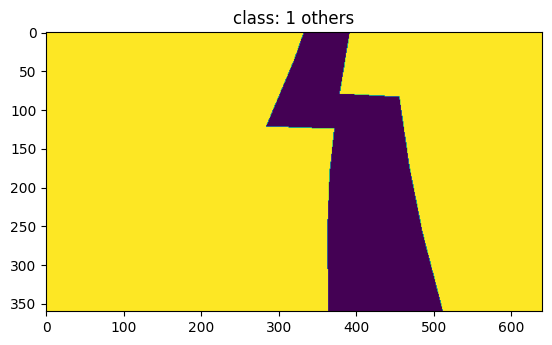

In [26]:
labels = ['blind sidewalks','others']
mask = plt.imread('BlindpathDatasets/mask/pic341.png')*255
#如果等一i就为255其他为0   
mask = np.where(mask == 128, 128, 255)
#取mask
mask1 = mask[:,:,0]
plt.title(f'class: {1} {labels[1]}')
plt.imshow(mask1)
plt.show()

In [32]:

%cd ~/PaddleSeg/PaddleSeg

/home/zifanwang/PaddleSeg/PaddleSeg


In [36]:
!python tools/data/split_dataset_list.py /home/zifanwang/PaddleSeg/BlindpathDatasets images annotations --split 0.7 0.3 0 --format png png


/bin/bash: /home/zifanwang/anaconda3/envs/AutoAnnotation/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Creating train.txt...
images/pic544.png annotations/pic544.png

images/pic362.png annotations/pic362.png

images/pic369.png annotations/pic369.png

images/pic294.png annotations/pic294.png

images/pic468.png annotations/pic468.png

images/pic778.png annotations/pic778.png

images/pic515.png annotations/pic515.png

images/pic597.png annotations/pic597.png

images/pic414.png annotations/pic414.png

images/pic330.png annotations/pic330.png

images/pic569.png annotations/pic569.png

images/pic755.png annotations/pic755.png

images/pic796.png annotations/pic796.png

images/pic767.png annotations/pic767.png

images/pic341.png annotations/pic341.png

images/pic283.png annotations/pic283.png

images/pic785.png annotations/pic785.png

images/pic645.png annotations/pic645.png

images/pic810.png annotations/pic810.png

images/pic342.png annotations/pic342.png

image

In [ ]:
%cd ~/PaddleSeg/PaddleSeg
!export CUDA_VISIBLE_DEVICES=0 
!python tools/train.py \
       --config configs/pp_liteseg/pp_liteseg_stdc1_camvid_960x720_10k.yml \
       --do_eval \
       --use_vdl \
       --save_interval 500 \
       --save_dir output

/home/zifanwang/PaddleSeg/PaddleSeg
/bin/bash: /home/zifanwang/anaconda3/envs/AutoAnnotation/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/zifanwang/anaconda3/envs/AutoAnnotation/lib/libtinfo.so.6: no version information available (required by /bin/bash)
2023-05-08 01:12:23 [WARNING]	Add the `num_classes` in train_dataset and val_dataset config to model config. We suggest you manually set `num_classes` in model config.
2023-05-08 01:12:23 [INFO]	
------------Environment Information-------------
platform: Linux-5.19.0-40-generic-x86_64-with-glibc2.35
Python: 3.10.11 (main, Apr 20 2023, 19:02:41) [GCC 11.2.0]
Paddle compiled with cuda: True
NVCC: Build cuda_11.7.r11.7/compiler.31442593_0
cudnn: 8.4
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA RTX', 'GPU 1: NVIDIA RTX', 'GPU 2: NVIDIA RTX', 'GPU 3: NVIDIA RTX']
GCC: gcc (Ubuntu 11.3.0-1ubuntu1~22.04) 11.3.0
PaddleSeg: 2.8.0
PaddlePaddle: 2.4.2
OpenCV: 4.5.5
-------------------

2023-05-08 01:16:26 [INFO]	[TRAIN] epoch: 8, iter: 170/10000, loss: 1.9108, lr: 0.008452, batch_cost: 1.2421, reader_cost: 0.74432, ips: 12.8815 samples/sec | ETA 03:23:29
2023-05-08 01:16:39 [INFO]	[TRAIN] epoch: 8, iter: 180/10000, loss: 1.9257, lr: 0.008951, batch_cost: 1.3141, reader_cost: 0.81504, ips: 12.1760 samples/sec | ETA 03:35:04
2023-05-08 01:16:53 [INFO]	[TRAIN] epoch: 9, iter: 190/10000, loss: 2.0588, lr: 0.009451, batch_cost: 1.3187, reader_cost: 0.81096, ips: 12.1328 samples/sec | ETA 03:35:36
2023-05-08 01:17:05 [INFO]	[TRAIN] epoch: 9, iter: 200/10000, loss: 1.8947, lr: 0.009950, batch_cost: 1.1894, reader_cost: 0.69529, ips: 13.4516 samples/sec | ETA 03:14:16
2023-05-08 01:17:17 [INFO]	[TRAIN] epoch: 10, iter: 210/10000, loss: 2.0655, lr: 0.009992, batch_cost: 1.2944, reader_cost: 0.79434, ips: 12.3610 samples/sec | ETA 03:31:12
2023-05-08 01:17:33 [INFO]	[TRAIN] epoch: 10, iter: 220/10000, loss: 1.9173, lr: 0.009983, batch_cost: 1.5101, reader_cost: 0.98239, ips: 1

2023-05-08 01:26:32 [INFO]	[TRAIN] epoch: 27, iter: 620/10000, loss: 2.0827, lr: 0.009614, batch_cost: 1.2243, reader_cost: 0.72419, ips: 13.0685 samples/sec | ETA 03:11:24
2023-05-08 01:26:45 [INFO]	[TRAIN] epoch: 28, iter: 630/10000, loss: 2.0413, lr: 0.009605, batch_cost: 1.2634, reader_cost: 0.77128, ips: 12.6647 samples/sec | ETA 03:17:17
2023-05-08 01:26:57 [INFO]	[TRAIN] epoch: 28, iter: 640/10000, loss: 2.0228, lr: 0.009596, batch_cost: 1.2337, reader_cost: 0.73578, ips: 12.9690 samples/sec | ETA 03:12:27
2023-05-08 01:27:10 [INFO]	[TRAIN] epoch: 29, iter: 650/10000, loss: 1.7041, lr: 0.009587, batch_cost: 1.2804, reader_cost: 0.78347, ips: 12.4962 samples/sec | ETA 03:19:31
2023-05-08 01:27:25 [INFO]	[TRAIN] epoch: 29, iter: 660/10000, loss: 1.8225, lr: 0.009577, batch_cost: 1.5541, reader_cost: 1.05231, ips: 10.2956 samples/sec | ETA 04:01:54
2023-05-08 01:27:38 [INFO]	[TRAIN] epoch: 30, iter: 670/10000, loss: 2.0724, lr: 0.009568, batch_cost: 1.3035, reader_cost: 0.80801, ip

2023-05-08 01:36:34 [INFO]	[TRAIN] epoch: 47, iter: 1060/10000, loss: 2.2938, lr: 0.009208, batch_cost: 1.4719, reader_cost: 0.96876, ips: 10.8703 samples/sec | ETA 03:39:18
2023-05-08 01:36:59 [INFO]	[TRAIN] epoch: 47, iter: 1070/10000, loss: 1.9135, lr: 0.009198, batch_cost: 2.4530, reader_cost: 1.89815, ips: 6.5227 samples/sec | ETA 06:05:05
2023-05-08 01:37:12 [INFO]	[TRAIN] epoch: 47, iter: 1080/10000, loss: 1.7614, lr: 0.009189, batch_cost: 1.2690, reader_cost: 0.76499, ips: 12.6079 samples/sec | ETA 03:08:39
2023-05-08 01:37:25 [INFO]	[TRAIN] epoch: 48, iter: 1090/10000, loss: 1.7209, lr: 0.009180, batch_cost: 1.3503, reader_cost: 0.85938, ips: 11.8492 samples/sec | ETA 03:20:31
2023-05-08 01:37:40 [INFO]	[TRAIN] epoch: 48, iter: 1100/10000, loss: 1.6671, lr: 0.009170, batch_cost: 1.5224, reader_cost: 1.01104, ips: 10.5095 samples/sec | ETA 03:45:49
2023-05-08 01:37:53 [INFO]	[TRAIN] epoch: 49, iter: 1110/10000, loss: 1.8580, lr: 0.009161, batch_cost: 1.2982, reader_cost: 0.7930

2023-05-08 01:46:45 [INFO]	[EVAL] The model with the best validation mIoU (0.9617) was saved at iter 1000.
2023-05-08 01:46:54 [INFO]	[TRAIN] epoch: 66, iter: 1510/10000, loss: 1.9061, lr: 0.008789, batch_cost: 0.9247, reader_cost: 0.42569, ips: 17.3028 samples/sec | ETA 02:10:50
2023-05-08 01:47:07 [INFO]	[TRAIN] epoch: 67, iter: 1520/10000, loss: 1.8006, lr: 0.008780, batch_cost: 1.2317, reader_cost: 0.73835, ips: 12.9901 samples/sec | ETA 02:54:04
2023-05-08 01:47:19 [INFO]	[TRAIN] epoch: 67, iter: 1530/10000, loss: 1.8719, lr: 0.008771, batch_cost: 1.2636, reader_cost: 0.77137, ips: 12.6627 samples/sec | ETA 02:58:22
2023-05-08 01:47:31 [INFO]	[TRAIN] epoch: 67, iter: 1540/10000, loss: 1.9284, lr: 0.008761, batch_cost: 1.2295, reader_cost: 0.73925, ips: 13.0133 samples/sec | ETA 02:53:21
2023-05-08 01:47:44 [INFO]	[TRAIN] epoch: 68, iter: 1550/10000, loss: 1.6918, lr: 0.008752, batch_cost: 1.2880, reader_cost: 0.79478, ips: 12.4228 samples/sec | ETA 03:01:23
2023-05-08 01:47:57 [IN

2023-05-08 01:57:05 [INFO]	[TRAIN] epoch: 87, iter: 1980/10000, loss: 1.4177, lr: 0.008350, batch_cost: 1.2440, reader_cost: 0.75222, ips: 12.8613 samples/sec | ETA 02:46:17
2023-05-08 01:57:18 [INFO]	[TRAIN] epoch: 87, iter: 1990/10000, loss: 1.2975, lr: 0.008341, batch_cost: 1.3327, reader_cost: 0.82612, ips: 12.0058 samples/sec | ETA 02:57:54
2023-05-08 01:57:32 [INFO]	[TRAIN] epoch: 87, iter: 2000/10000, loss: 1.2613, lr: 0.008332, batch_cost: 1.3667, reader_cost: 0.86927, ips: 11.7069 samples/sec | ETA 03:02:13
2023-05-08 01:57:32 [INFO]	Start evaluating (total_samples: 160, total_iters: 160)...
160/160 [==============================] - 3s 16ms/step - batch_cost: 0.0163 - reader cost: 1.6155e-04
2023-05-08 01:57:34 [INFO]	[EVAL] #Images: 160 mIoU: 0.9669 Acc: 0.9901 Kappa: 0.9661 Dice: 0.9831
2023-05-08 01:57:34 [INFO]	[EVAL] Class IoU: 
[0.988  0.9458]
2023-05-08 01:57:34 [INFO]	[EVAL] Class Precision: 
[0.9914 0.9838]
2023-05-08 01:57:34 [INFO]	[EVAL] Class Recall: 
[0.9965 0.9

2023-05-08 02:06:34 [INFO]	[TRAIN] epoch: 106, iter: 2420/10000, loss: 1.6237, lr: 0.007937, batch_cost: 1.2257, reader_cost: 0.73236, ips: 13.0536 samples/sec | ETA 02:34:50
2023-05-08 02:06:45 [INFO]	[TRAIN] epoch: 106, iter: 2430/10000, loss: 1.6087, lr: 0.007927, batch_cost: 1.1773, reader_cost: 0.68657, ips: 13.5901 samples/sec | ETA 02:28:32
2023-05-08 02:06:59 [INFO]	[TRAIN] epoch: 107, iter: 2440/10000, loss: 1.3805, lr: 0.007918, batch_cost: 1.3234, reader_cost: 0.83323, ips: 12.0904 samples/sec | ETA 02:46:44
2023-05-08 02:07:11 [INFO]	[TRAIN] epoch: 107, iter: 2450/10000, loss: 1.5460, lr: 0.007909, batch_cost: 1.2102, reader_cost: 0.72379, ips: 13.2205 samples/sec | ETA 02:32:17
2023-05-08 02:07:23 [INFO]	[TRAIN] epoch: 107, iter: 2460/10000, loss: 1.6667, lr: 0.007899, batch_cost: 1.2518, reader_cost: 0.76302, ips: 12.7813 samples/sec | ETA 02:37:18
2023-05-08 02:07:36 [INFO]	[TRAIN] epoch: 108, iter: 2470/10000, loss: 1.4772, lr: 0.007890, batch_cost: 1.2509, reader_cost:

2023-05-08 02:15:55 [INFO]	[TRAIN] epoch: 125, iter: 2860/10000, loss: 1.2275, lr: 0.007521, batch_cost: 1.2638, reader_cost: 0.76826, ips: 12.6604 samples/sec | ETA 02:30:23
2023-05-08 02:16:08 [INFO]	[TRAIN] epoch: 125, iter: 2870/10000, loss: 1.2025, lr: 0.007512, batch_cost: 1.2692, reader_cost: 0.77394, ips: 12.6060 samples/sec | ETA 02:30:49
2023-05-08 02:16:21 [INFO]	[TRAIN] epoch: 126, iter: 2880/10000, loss: 1.3045, lr: 0.007502, batch_cost: 1.2622, reader_cost: 0.76602, ips: 12.6766 samples/sec | ETA 02:29:46
2023-05-08 02:16:34 [INFO]	[TRAIN] epoch: 126, iter: 2890/10000, loss: 1.4077, lr: 0.007493, batch_cost: 1.3770, reader_cost: 0.87263, ips: 11.6192 samples/sec | ETA 02:43:10
2023-05-08 02:16:47 [INFO]	[TRAIN] epoch: 127, iter: 2900/10000, loss: 1.5377, lr: 0.007483, batch_cost: 1.2558, reader_cost: 0.75374, ips: 12.7413 samples/sec | ETA 02:28:35
2023-05-08 02:17:00 [INFO]	[TRAIN] epoch: 127, iter: 2910/10000, loss: 1.3283, lr: 0.007474, batch_cost: 1.2755, reader_cost:

2023-05-08 02:25:18 [INFO]	[TRAIN] epoch: 144, iter: 3300/10000, loss: 1.0629, lr: 0.007103, batch_cost: 1.2082, reader_cost: 0.71131, ips: 13.2426 samples/sec | ETA 02:14:55
2023-05-08 02:25:31 [INFO]	[TRAIN] epoch: 144, iter: 3310/10000, loss: 1.1497, lr: 0.007093, batch_cost: 1.2672, reader_cost: 0.77240, ips: 12.6259 samples/sec | ETA 02:21:17
2023-05-08 02:25:43 [INFO]	[TRAIN] epoch: 145, iter: 3320/10000, loss: 1.0408, lr: 0.007084, batch_cost: 1.2279, reader_cost: 0.73179, ips: 13.0306 samples/sec | ETA 02:16:42
2023-05-08 02:25:56 [INFO]	[TRAIN] epoch: 145, iter: 3330/10000, loss: 1.0136, lr: 0.007074, batch_cost: 1.2904, reader_cost: 0.79487, ips: 12.3992 samples/sec | ETA 02:23:27
2023-05-08 02:26:09 [INFO]	[TRAIN] epoch: 146, iter: 3340/10000, loss: 0.9325, lr: 0.007065, batch_cost: 1.2776, reader_cost: 0.77675, ips: 12.5240 samples/sec | ETA 02:21:48
2023-05-08 02:26:21 [INFO]	[TRAIN] epoch: 146, iter: 3350/10000, loss: 1.2779, lr: 0.007055, batch_cost: 1.2340, reader_cost:

2023-05-08 02:34:32 [INFO]	[TRAIN] epoch: 163, iter: 3740/10000, loss: 1.1633, lr: 0.006682, batch_cost: 1.2714, reader_cost: 0.77664, ips: 12.5844 samples/sec | ETA 02:12:39
2023-05-08 02:34:44 [INFO]	[TRAIN] epoch: 164, iter: 3750/10000, loss: 1.5443, lr: 0.006672, batch_cost: 1.2102, reader_cost: 0.72316, ips: 13.2207 samples/sec | ETA 02:06:03
2023-05-08 02:34:56 [INFO]	[TRAIN] epoch: 164, iter: 3760/10000, loss: 1.9932, lr: 0.006662, batch_cost: 1.2120, reader_cost: 0.71277, ips: 13.2016 samples/sec | ETA 02:06:02
2023-05-08 02:35:08 [INFO]	[TRAIN] epoch: 164, iter: 3770/10000, loss: 1.6813, lr: 0.006653, batch_cost: 1.2128, reader_cost: 0.71499, ips: 13.1932 samples/sec | ETA 02:05:55
2023-05-08 02:35:21 [INFO]	[TRAIN] epoch: 165, iter: 3780/10000, loss: 1.5838, lr: 0.006643, batch_cost: 1.2934, reader_cost: 0.79844, ips: 12.3708 samples/sec | ETA 02:14:04
2023-05-08 02:35:34 [INFO]	[TRAIN] epoch: 165, iter: 3790/10000, loss: 1.4070, lr: 0.006633, batch_cost: 1.2444, reader_cost:

2023-05-08 02:43:43 [INFO]	[TRAIN] epoch: 182, iter: 4180/10000, loss: 1.4893, lr: 0.006257, batch_cost: 1.2748, reader_cost: 0.77321, ips: 12.5508 samples/sec | ETA 02:03:39
2023-05-08 02:43:55 [INFO]	[TRAIN] epoch: 183, iter: 4190/10000, loss: 1.1275, lr: 0.006248, batch_cost: 1.2398, reader_cost: 0.74366, ips: 12.9052 samples/sec | ETA 02:00:03
2023-05-08 02:44:08 [INFO]	[TRAIN] epoch: 183, iter: 4200/10000, loss: 0.9694, lr: 0.006238, batch_cost: 1.2848, reader_cost: 0.79366, ips: 12.4531 samples/sec | ETA 02:04:11
2023-05-08 02:44:21 [INFO]	[TRAIN] epoch: 184, iter: 4210/10000, loss: 0.9840, lr: 0.006228, batch_cost: 1.2739, reader_cost: 0.77876, ips: 12.5602 samples/sec | ETA 02:02:55
2023-05-08 02:44:34 [INFO]	[TRAIN] epoch: 184, iter: 4220/10000, loss: 0.9390, lr: 0.006219, batch_cost: 1.2954, reader_cost: 0.79798, ips: 12.3514 samples/sec | ETA 02:04:47
2023-05-08 02:44:46 [INFO]	[TRAIN] epoch: 184, iter: 4230/10000, loss: 0.8477, lr: 0.006209, batch_cost: 1.2401, reader_cost:

2023-05-08 02:52:54 [INFO]	[TRAIN] epoch: 201, iter: 4620/10000, loss: 0.9788, lr: 0.005830, batch_cost: 1.2488, reader_cost: 0.75645, ips: 12.8126 samples/sec | ETA 01:51:58
2023-05-08 02:53:06 [INFO]	[TRAIN] epoch: 202, iter: 4630/10000, loss: 0.9545, lr: 0.005820, batch_cost: 1.2073, reader_cost: 0.71244, ips: 13.2531 samples/sec | ETA 01:48:03
2023-05-08 02:53:19 [INFO]	[TRAIN] epoch: 202, iter: 4640/10000, loss: 0.8585, lr: 0.005811, batch_cost: 1.2612, reader_cost: 0.76528, ips: 12.6859 samples/sec | ETA 01:52:40
2023-05-08 02:53:31 [INFO]	[TRAIN] epoch: 203, iter: 4650/10000, loss: 0.9760, lr: 0.005801, batch_cost: 1.2524, reader_cost: 0.75749, ips: 12.7759 samples/sec | ETA 01:51:40
2023-05-08 02:53:44 [INFO]	[TRAIN] epoch: 203, iter: 4660/10000, loss: 1.1164, lr: 0.005791, batch_cost: 1.2796, reader_cost: 0.78420, ips: 12.5038 samples/sec | ETA 01:53:53
2023-05-08 02:53:57 [INFO]	[TRAIN] epoch: 204, iter: 4670/10000, loss: 0.8841, lr: 0.005781, batch_cost: 1.2725, reader_cost:

2023-05-08 03:02:04 [INFO]	[TRAIN] epoch: 220, iter: 5060/10000, loss: 0.8886, lr: 0.005399, batch_cost: 1.2297, reader_cost: 0.73279, ips: 13.0113 samples/sec | ETA 01:41:14
2023-05-08 03:02:17 [INFO]	[TRAIN] epoch: 221, iter: 5070/10000, loss: 0.8636, lr: 0.005389, batch_cost: 1.2839, reader_cost: 0.78994, ips: 12.4619 samples/sec | ETA 01:45:29
2023-05-08 03:02:30 [INFO]	[TRAIN] epoch: 221, iter: 5080/10000, loss: 0.8131, lr: 0.005380, batch_cost: 1.2213, reader_cost: 0.72318, ips: 13.1012 samples/sec | ETA 01:40:08
2023-05-08 03:02:42 [INFO]	[TRAIN] epoch: 222, iter: 5090/10000, loss: 0.8031, lr: 0.005370, batch_cost: 1.2699, reader_cost: 0.77078, ips: 12.5991 samples/sec | ETA 01:43:55
2023-05-08 03:02:55 [INFO]	[TRAIN] epoch: 222, iter: 5100/10000, loss: 0.8384, lr: 0.005360, batch_cost: 1.2355, reader_cost: 0.73867, ips: 12.9503 samples/sec | ETA 01:40:53
2023-05-08 03:03:07 [INFO]	[TRAIN] epoch: 223, iter: 5110/10000, loss: 0.9097, lr: 0.005350, batch_cost: 1.2839, reader_cost:

2023-05-08 03:11:21 [INFO]	[EVAL] The model with the best validation mIoU (0.9798) was saved at iter 3500.
2023-05-08 03:11:31 [INFO]	[TRAIN] epoch: 240, iter: 5510/10000, loss: 0.7484, lr: 0.004955, batch_cost: 0.9646, reader_cost: 0.46460, ips: 16.5874 samples/sec | ETA 01:12:10
2023-05-08 03:11:43 [INFO]	[TRAIN] epoch: 240, iter: 5520/10000, loss: 0.6985, lr: 0.004945, batch_cost: 1.2578, reader_cost: 0.77188, ips: 12.7206 samples/sec | ETA 01:33:54
2023-05-08 03:11:56 [INFO]	[TRAIN] epoch: 241, iter: 5530/10000, loss: 0.7494, lr: 0.004935, batch_cost: 1.2837, reader_cost: 0.78385, ips: 12.4641 samples/sec | ETA 01:35:38
2023-05-08 03:12:09 [INFO]	[TRAIN] epoch: 241, iter: 5540/10000, loss: 0.7246, lr: 0.004925, batch_cost: 1.2325, reader_cost: 0.74182, ips: 12.9815 samples/sec | ETA 01:31:37
2023-05-08 03:12:21 [INFO]	[TRAIN] epoch: 242, iter: 5550/10000, loss: 0.7831, lr: 0.004915, batch_cost: 1.2427, reader_cost: 0.74752, ips: 12.8749 samples/sec | ETA 01:32:10


In [1]:
%cd ~/PaddleSeg/PaddleSeg

/home/zifanwang/PaddleSeg/PaddleSeg


In [2]:
!export CUDA_VISIBLE_DEVICES=0

!python tools/val.py \
       --config configs/pp_liteseg/pp_liteseg_stdc1_camvid_960x720_10k.yml \
       --model_path output/best_model/model.pdparams

/bin/bash: /home/zifanwang/anaconda3/envs/AutoAnnotation/lib/libtinfo.so.6: no version information available (required by /bin/bash)
/bin/bash: /home/zifanwang/anaconda3/envs/AutoAnnotation/lib/libtinfo.so.6: no version information available (required by /bin/bash)
2023-05-08 13:54:23 [WARNING]	Add the `num_classes` in train_dataset and val_dataset config to model config. We suggest you manually set `num_classes` in model config.
2023-05-08 13:54:23 [INFO]	
------------Environment Information-------------
platform: Linux-5.19.0-40-generic-x86_64-with-glibc2.35
Python: 3.10.11 (main, Apr 20 2023, 19:02:41) [GCC 11.2.0]
Paddle compiled with cuda: True
NVCC: Build cuda_11.7.r11.7/compiler.31442593_0
cudnn: 8.4
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA RTX', 'GPU 1: NVIDIA RTX', 'GPU 2: NVIDIA RTX', 'GPU 3: NVIDIA RTX']
GCC: gcc (Ubuntu 11.3.0-1ubuntu1~22.04) 11.3.0
PaddleSeg: 2.8.0
PaddlePaddle: 2.4.2
OpenCV: 4.5.5
------------------------------------------------
2023-0

In [3]:
!python tools/val.py \
       --config configs/pp_liteseg/pp_liteseg_stdc1_camvid_960x720_10k.yml \
       --model_path output/iter_10000/model.pdparams

/bin/bash: /home/zifanwang/anaconda3/envs/AutoAnnotation/lib/libtinfo.so.6: no version information available (required by /bin/bash)
2023-05-08 13:55:28 [WARNING]	Add the `num_classes` in train_dataset and val_dataset config to model config. We suggest you manually set `num_classes` in model config.
2023-05-08 13:55:28 [INFO]	
------------Environment Information-------------
platform: Linux-5.19.0-40-generic-x86_64-with-glibc2.35
Python: 3.10.11 (main, Apr 20 2023, 19:02:41) [GCC 11.2.0]
Paddle compiled with cuda: True
NVCC: Build cuda_11.7.r11.7/compiler.31442593_0
cudnn: 8.4
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA RTX', 'GPU 1: NVIDIA RTX', 'GPU 2: NVIDIA RTX', 'GPU 3: NVIDIA RTX']
GCC: gcc (Ubuntu 11.3.0-1ubuntu1~22.04) 11.3.0
PaddleSeg: 2.8.0
PaddlePaddle: 2.4.2
OpenCV: 4.5.5
------------------------------------------------
2023-05-08 13:55:28 [INFO]	
---------------Config Information---------------
batch_size: 16
iters: 10000
train_dataset:
  dataset_root: /ho

In [5]:
!python tools/predict.py \
       --config configs/pp_liteseg/pp_liteseg_stdc1_camvid_960x720_10k.yml \
       --model_path output/best_model/model.pdparams \
       --image_path /home/zifanwang/PaddleSeg/BlindpathDatasets/images \
       --save_dir output/pre_result

/bin/bash: /home/zifanwang/anaconda3/envs/AutoAnnotation/lib/libtinfo.so.6: no version information available (required by /bin/bash)
2023-05-08 14:03:59 [WARNING]	Add the `num_classes` in train_dataset and val_dataset config to model config. We suggest you manually set `num_classes` in model config.
2023-05-08 14:03:59 [INFO]	
------------Environment Information-------------
platform: Linux-5.19.0-40-generic-x86_64-with-glibc2.35
Python: 3.10.11 (main, Apr 20 2023, 19:02:41) [GCC 11.2.0]
Paddle compiled with cuda: True
NVCC: Build cuda_11.7.r11.7/compiler.31442593_0
cudnn: 8.4
GPUs used: 1
CUDA_VISIBLE_DEVICES: None
GPU: ['GPU 0: NVIDIA RTX', 'GPU 1: NVIDIA RTX', 'GPU 2: NVIDIA RTX', 'GPU 3: NVIDIA RTX']
GCC: gcc (Ubuntu 11.3.0-1ubuntu1~22.04) 11.3.0
PaddleSeg: 2.8.0
PaddlePaddle: 2.4.2
OpenCV: 4.5.5
------------------------------------------------
2023-05-08 14:03:59 [INFO]	
---------------Config Information---------------
batch_size: 16
iters: 10000
train_dataset:
  dataset_root: /ho

In [2]:
import paddle
import numpy as np
from paddleseg.core import predict
from paddleseg.cvlibs import manager, Config, SegBuilder
from paddleseg.transforms import Compose
from paddleseg.core import infer
from paddleseg.utils import get_sys_env, logger, get_image_list, utils,progbar, visualize
def preprocess(im_path, transforms):
    data = {}
    data['img'] = im_path
    data = transforms(data)
    data['img'] = data['img'][np.newaxis, ...]
    data['img'] = paddle.to_tensor(data['img'])
    return data

In [5]:
cfg = Config('/home/zifanwang/PaddleSeg/PaddleSeg/configs/pp_liteseg/pp_liteseg_stdc1_camvid_960x720_10k.yml')


Image_path = '/home/zifanwang/PaddleSeg/BlindpathDatasets/pre_test'
ModelPath = '/home/zifanwang/PaddleSeg/PaddleSeg/output/best_model/model.pdparams'
save_dir = '/home/zifanwang/PaddleSeg/PaddleSeg/output/pre_test'
builder = SegBuilder(cfg)
Model = builder.model
transforms = Compose(builder.val_transforms)
Image_list, Image_dir = get_image_list(Image_path)

2023-05-08 15:06:21 [WARNING]	Add the `num_classes` in train_dataset and val_dataset config to model config. We suggest you manually set `num_classes` in model config.
2023-05-08 15:06:21 [INFO]	Use the following config to build model
model:
  arm_out_chs:
  - 32
  - 64
  - 128
  backbone:
    pretrained: https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet1.tar.gz
    type: STDC1
  num_classes: 2
  seg_head_inter_chs:
  - 32
  - 64
  - 64
  type: PPLiteSeg


W0508 15:06:21.241396 1884952 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 8.6, Driver API Version: 11.7, Runtime API Version: 11.7
W0508 15:06:21.287755 1884952 gpu_resources.cc:91] device: 0, cuDNN Version: 8.4.


2023-05-08 15:06:24 [INFO]	Loading pretrained model from https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet1.tar.gz
2023-05-08 15:06:24 [INFO]	There are 145/145 variables loaded into STDCNet.


In [16]:
utils.load_entire_model(Model, ModelPath)
Model.eval()
nranks = paddle.distributed.get_world_size()
local_rank = paddle.distributed.get_rank()
logger.info("Start to predict...")
Image_list = [Image_list]
progbar_pred = progbar.Progbar(target=len(Image_list[0]), verbose=1)
color_map = visualize.get_color_map_list(256, custom_color=None)

2023-05-08 15:14:57 [INFO]	Loading pretrained model from /home/zifanwang/PaddleSeg/PaddleSeg/output/best_model/model.pdparams
2023-05-08 15:14:58 [INFO]	There are 250/250 variables loaded into PPLiteSeg.
2023-05-08 15:14:58 [INFO]	Start to predict...


In [19]:
for i, im_path in enumerate(Image_list[0]):
    print(i)
    print(im_path)

0
/home/zifanwang/PaddleSeg/BlindpathDatasets/pre_test/pic601.png
1
/home/zifanwang/PaddleSeg/BlindpathDatasets/pre_test/pic597.png
2
/home/zifanwang/PaddleSeg/BlindpathDatasets/pre_test/pic569.png
3
/home/zifanwang/PaddleSeg/BlindpathDatasets/pre_test/pic592.png
4
/home/zifanwang/PaddleSeg/BlindpathDatasets/pre_test/pic604.png
5
/home/zifanwang/PaddleSeg/BlindpathDatasets/pre_test/pic615.png


In [29]:
PrePic = '/home/zifanwang/PaddleSeg/BlindpathDatasets/pre_test/pic601.png'

data = preprocess(PrePic, transforms)

In [32]:
with paddle.no_grad():
    pred, _ = infer.inference(
    Model,
    data['img'],
    trans_info=data['trans_info'],
    is_slide=False,
    stride=None,
    crop_size=None)
pred = paddle.squeeze(pred)
pred = pred.numpy().astype('uint8')

added_image = visualize.visualize(PrePic, pred, color_map, weight=0.6)

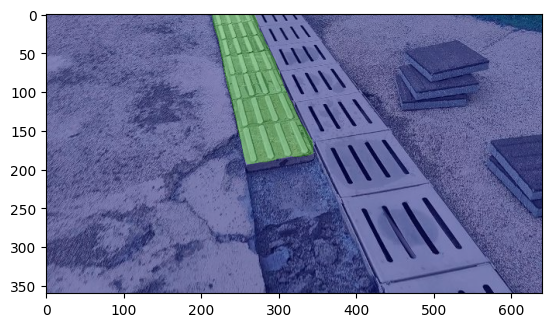

In [34]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(added_image)

In [18]:

predict(
        Model,
        model_path=ModelPath,# Model path
        transforms=transforms, # Transform.Compose， Preprocess the input image
        image_list=Image_list, # List of image paths to be predicted。
        image_dir=Image_dir, # The directory where the picture to be predicted is located
        save_dir='/home/zifanwang/PaddleSeg/PaddleSeg/output/results' # Output path
    )

2023-05-08 14:27:04 [INFO]	Loading pretrained model from /home/zifanwang/PaddleSeg/PaddleSeg/output/best_model/model.pdparams
2023-05-08 14:27:05 [INFO]	There are 250/250 variables loaded into PPLiteSeg.
2023-05-08 14:27:05 [INFO]	Start to predict...


6/6 [==============================] - 4s 732ms/step


2023-05-08 14:27:09 [INFO]	Predicted images are saved in /home/zifanwang/PaddleSeg/PaddleSeg/output/results/added_prediction and /home/zifanwang/PaddleSeg/PaddleSeg/output/results/pseudo_color_prediction .


In [3]:
import paddle
import numpy as np
from paddleseg.core import predict
from paddleseg.cvlibs import manager, Config, SegBuilder
from paddleseg.transforms import Compose
from paddleseg.core import infer
from paddleseg.utils import get_sys_env, logger, get_image_list, utils,progbar, visualize
def preprocess(im_path, transforms):
    data = {}
    data['img'] = im_path
    data = transforms(data)
    data['img'] = data['img'][np.newaxis, ...]
    data['img'] = paddle.to_tensor(data['img'])
    return data


In [5]:
import paddle
import numpy as np
from paddleseg.core import predict
from paddleseg.cvlibs import manager, Config, SegBuilder
from paddleseg.transforms import Compose
from paddleseg.core import infer
from paddleseg.utils import get_sys_env, logger, get_image_list, utils,progbar, visualize
def preprocess(im_path, transforms):
    data = {}
    data['img'] = im_path
    data = transforms(data)
    data['img'] = data['img'][np.newaxis, ...]
    data['img'] = paddle.to_tensor(data['img'])
    return data

#load necessary params

cfg = Config('/home/zifanwang/PaddleSeg/PaddleSeg/configs/pp_liteseg/pp_liteseg_stdc1_camvid_960x720_10k.yml')
Image_path = '/home/zifanwang/PaddleSeg/BlindpathDatasets/pre_test'
ModelPath = '/home/zifanwang/PaddleSeg/PaddleSeg/output/best_model/model.pdparams'
save_dir = '/home/zifanwang/PaddleSeg/PaddleSeg/output/pre_test'

#load model
builder = SegBuilder(cfg)
Model = builder.model
utils.load_entire_model(Model, ModelPath)
Model.eval()
transforms = Compose(builder.val_transforms)
Image_list, Image_dir = get_image_list(Image_path)


#load pic
nranks = paddle.distributed.get_world_size()
local_rank = paddle.distributed.get_rank()

Image_list = [Image_list]
progbar_pred = progbar.Progbar(target=len(Image_list[0]), verbose=1)

#used to visulize
color_map = visualize.get_color_map_list(256, custom_color=None)


logger.info("Start to predict...")




2023-05-09 20:49:42 [WARNING]	Add the `num_classes` in train_dataset and val_dataset config to model config. We suggest you manually set `num_classes` in model config.
2023-05-09 20:49:42 [INFO]	Use the following config to build model
model:
  arm_out_chs:
  - 32
  - 64
  - 128
  backbone:
    pretrained: https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet1.tar.gz
    type: STDC1
  num_classes: 2
  seg_head_inter_chs:
  - 32
  - 64
  - 64
  type: PPLiteSeg


W0509 20:49:42.795265 3377500 gpu_resources.cc:61] Please NOTE: device: 0, GPU Compute Capability: 8.6, Driver API Version: 11.7, Runtime API Version: 11.7
W0509 20:49:42.818284 3377500 gpu_resources.cc:91] device: 0, cuDNN Version: 8.4.


2023-05-09 20:49:45 [INFO]	Loading pretrained model from https://bj.bcebos.com/paddleseg/dygraph/PP_STDCNet1.tar.gz
2023-05-09 20:49:46 [INFO]	There are 145/145 variables loaded into STDCNet.
2023-05-09 20:49:46 [INFO]	Loading pretrained model from /home/zifanwang/PaddleSeg/PaddleSeg/output/best_model/model.pdparams
2023-05-09 20:49:47 [INFO]	There are 250/250 variables loaded into PPLiteSeg.
2023-05-09 20:49:47 [INFO]	Start to predict...


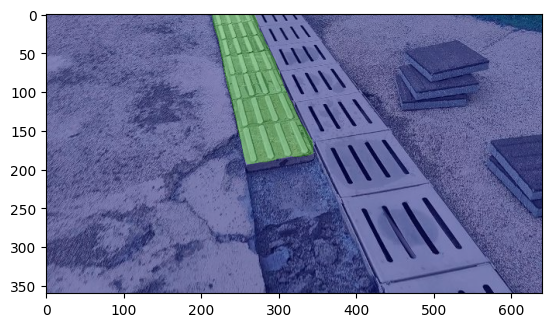

In [73]:
#process single image

PrePic = '/home/zifanwang/PaddleSeg/BlindpathDatasets/pre_test/pic601.png'

data = preprocess(PrePic, transforms)


with paddle.no_grad():
    pred, _ = infer.inference(
    Model,
    data['img'],
    trans_info=data['trans_info'],
    is_slide=False,
    stride=None,
    crop_size=None)
pred = paddle.squeeze(pred)
pred = pred.numpy().astype('uint8')

added_image = visualize.visualize(PrePic, pred, color_map, weight=0.6)
plt.imshow(added_image)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from IPython.display import clear_output, Image, display, HTML
import time
import cv2
import base64
current_time = 0
def processImg(img):
    # 画出一个框
    cv2.rectangle(img, (500, 300), (800, 400), (0, 0, 255), 5, 1, 0)
    # 上下翻转
    # img= cv2.flip(img, 0)

    # 显示FPS
    global current_time
    if current_time == 0:
        current_time = time.time()
    else:
        last_time = current_time
        current_time = time.time()
        fps = 1. / (current_time - last_time)
        text = "FPS: %d" % int(fps)
        cv2.putText(img, text , (0,100), cv2.FONT_HERSHEY_TRIPLEX, 3.65, (255, 0, 0), 2)
    
    return img

def arrayShow(imageArray):
    ret, png = cv2.imencode('.png', imageArray)
    encoded = base64.b64encode(png)
    return Image(data=encoded.decode('ascii'))


In [23]:
#process video
cap = cv2.VideoCapture('/home/zifanwang/PaddleSeg/SegBlind-dep.mp4') 

#fps = cap.get(cv2.CAP_PROP_FPS)
#size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

out = cv2.VideoWriter('SegBlind-result.mp4', fourcc,30,(1920,1080))


In [24]:
if cap.isOpened():  # 判断是否正常打开
    rval, frame = cap.read()
else:
    print("open fial")
    rval = False
print(rval)

True


In [25]:
#cv2.imshow('frame',frame)

In [ ]:
a = 1
while(cap.isOpened()):
    # 逐帧读取，ret返回布尔值
    # 参数ret为True 或者False,代表有没有读取到图片
    # frame表示截取到一帧的图片
    #print("read")
    ret, frame = cap.read()
    if ret == True:
        # 垂直翻转矩阵
        # frame = cv2.flip(frame,0)

        out.write(frame)
        cv2.imwrite('temp/pic.png', frame)
        PrePic = 'temp/pic.png'
        data = preprocess(PrePic, transforms)
        with paddle.no_grad():
            pred, _ = infer.inference(
            Model,
            data['img'],
            trans_info=data['trans_info'],
            is_slide=False,
            stride=None,
            crop_size=None)
        pred = paddle.squeeze(pred)
        pred = pred.numpy().astype('uint8')
        added_image = visualize.visualize(PrePic, pred, color_map, weight=0.6)
        cv2.imwrite('output_img/pic'+str(a)+'.png', pred)
        a = a+1
        out.write(added_image)
        #cv2.imshow('frame',frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

out.release()
cap.release()

In [21]:
timeF = 5  # 视频帧计数间隔频率
size = (640, 360)
c = 1
a = 1
time_sum = 0
video =list()
print(type(video))
while rval:  # 循环读取视频帧
    rval, frame = vc.read()
    if (rval ==False):
        break
    frame = cv2.resize(frame,size)
    if (c % timeF == 0):  # 每隔timeF帧进行存储操作
        time_start = time.time()  # 记录开始时间
        # function()   执行的程序
        cv2.imwrite('temp/pic.png', frame)
        PrePic = 'temp/pic.png'
        data = preprocess(PrePic, transforms)
        with paddle.no_grad():
            pred, _ = infer.inference(
            Model,
            data['img'],
            trans_info=data['trans_info'],
            is_slide=False,
            stride=None,
            crop_size=None)
        pred = paddle.squeeze(pred)
        pred = pred.numpy().astype('uint8')
        added_image = visualize.visualize(PrePic, pred, color_map, weight=0.6)
        video.append(added_image)
        cv2.imwrite('output_img/pic'+str(a)+'.png', pred)
        a = a+1
        videowriter.write(frame)
        time_end = time.time()  # 记录结束时间
        time_sum = time_sum + time_end - time_start  # 计算的时间差为程序的执行时间，单位为秒/s
        #print(time_sum)
        plt.imshow(added_image)
        plt.show()
#         lines, columns, _ = frame.shape
#         added_image = processImg(added_image)
#         added_image = cv2.resize(added_image, (int(columns / 4), int(lines / 4)))

#         img = arrayShow(added_image)
#         display(img)

    c = c + 1
    cv2.waitKey(1)
videowriter.release()
vc.release()
print('Hz:',1/(time_sum/a))                

<class 'list'>


ZeroDivisionError: float division by zero

In [ ]:
for i, im_path in enumerate(Image_list[0]):
    data = preprocess(im_path, transforms)
    with paddle.no_grad():
        pred, _ = infer.inference(
        Model,
        data['img'],
        trans_info=data['trans_info'],
        is_slide=False,
        stride=None,
        crop_size=None)
    pred = paddle.squeeze(pred)
    pred = pred.numpy().astype('uint8')
    added_image = visualize.visualize(PrePic, pred, color_map, weight=0.6)
    plt.imshow(added_image)

In [50]:
def preprocess(im_path, transforms):
    data = {}
    data['img'] = im_path
    print(data)
    data = transforms(data)
    print(data)
    data['img'] = data['img'][np.newaxis, ...]
    data['img']= paddle.to_tensor(data['img'])
    return data
PrePic = '/home/zifanwang/PaddleSeg/BlindpathDatasets/pre_test/pic601.png'
data = preprocess(PrePic, transforms)

data['img']

{'img': '/home/zifanwang/PaddleSeg/BlindpathDatasets/pre_test/pic601.png'}
{'img': array([[[ 0.5764706 ,  0.17647064,  0.41960788, ..., -0.36470586,
         -0.19215685, -0.45098037],
        [ 0.07450986,  0.62352943,  0.21568632, ..., -0.372549  ,
         -0.4588235 , -0.4352941 ],
        [ 0.26274514,  0.3176471 ,  0.23921573, ..., -0.2235294 ,
         -0.5372549 , -0.29411763],
        ...,
        [-0.1607843 ,  0.52156866,  0.26274514, ...,  0.14509809,
          0.30980396,  0.28627455],
        [-0.1607843 ,  0.27843142,  0.27058828, ...,  0.54509807,
          0.18431377,  0.20784318],
        [ 0.254902  ,  0.28627455,  0.4431373 , ...,  0.62352943,
          0.14509809,  0.43529415]],

       [[ 0.5764706 ,  0.17647064,  0.41960788, ..., -0.05098039,
          0.12156868, -0.1372549 ],
        [ 0.07450986,  0.62352943,  0.21568632, ..., -0.05882353,
         -0.14509803, -0.12156862],
        [ 0.26274514,  0.3176471 ,  0.23921573, ...,  0.06666672,
         -0.24705881

Tensor(shape=[1, 3, 360, 640], dtype=float32, place=Place(gpu:0), stop_gradient=True,
       [[[[ 0.57647061,  0.17647064,  0.41960788, ..., -0.36470586,
           -0.19215685, -0.45098037],
          [ 0.07450986,  0.62352943,  0.21568632, ..., -0.37254900,
           -0.45882350, -0.43529409],
          [ 0.26274514,  0.31764710,  0.23921573, ..., -0.22352940,
           -0.53725493, -0.29411763],
          ...,
          [-0.16078430,  0.52156866,  0.26274514, ...,  0.14509809,
            0.30980396,  0.28627455],
          [-0.16078430,  0.27843142,  0.27058828, ...,  0.54509807,
            0.18431377,  0.20784318],
          [ 0.25490201,  0.28627455,  0.44313729, ...,  0.62352943,
            0.14509809,  0.43529415]],

         [[ 0.57647061,  0.17647064,  0.41960788, ..., -0.05098039,
            0.12156868, -0.13725489],
          [ 0.07450986,  0.62352943,  0.21568632, ..., -0.05882353,
           -0.14509803, -0.12156862],
          [ 0.26274514,  0.31764710,  0.23921573,

In [62]:
import os
frame
cv2.imwrite('temp/pic_temp.png', frame)
y = cv2.imread('temp/pic_temp.png')
y
os.remove('temp/pic_temp.png')

In [83]:
frame